In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df=pd.read_csv('/content/diabetes.csv');
df.columns = df.columns.str.strip()

In [ ]:
df.shape

(768, 9)

In [ ]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [ ]:
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))

In [ ]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)


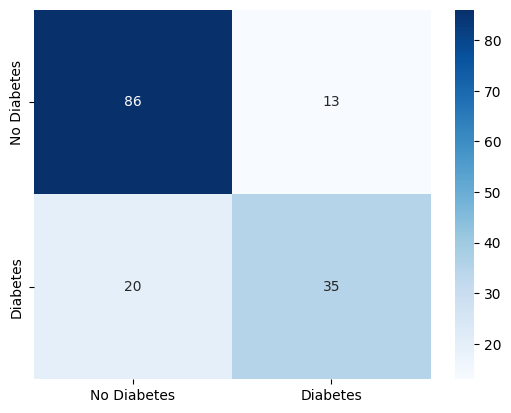

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



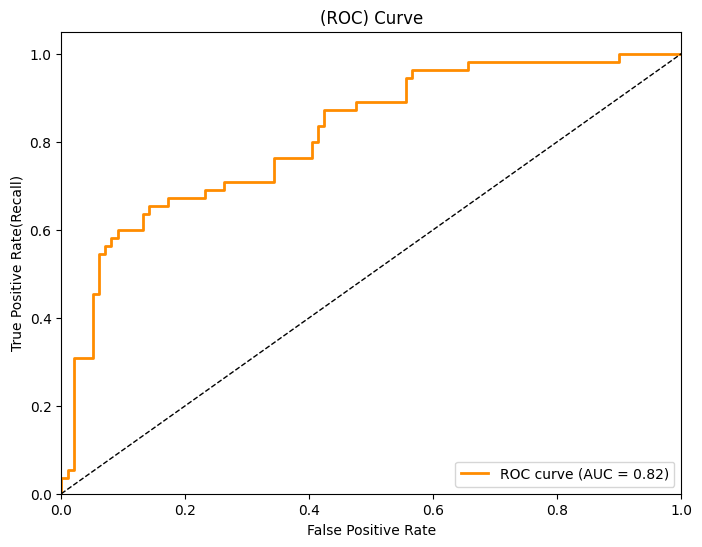

In [ ]:
from sklearn.metrics import roc_curve,auc,f1_score,precision_score,recall_score

y_pred_proba = lr.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1],'k--',lw=1 )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate(Recall)')
plt.title('(ROC) Curve')
plt.legend(loc="lower right")
plt.show()

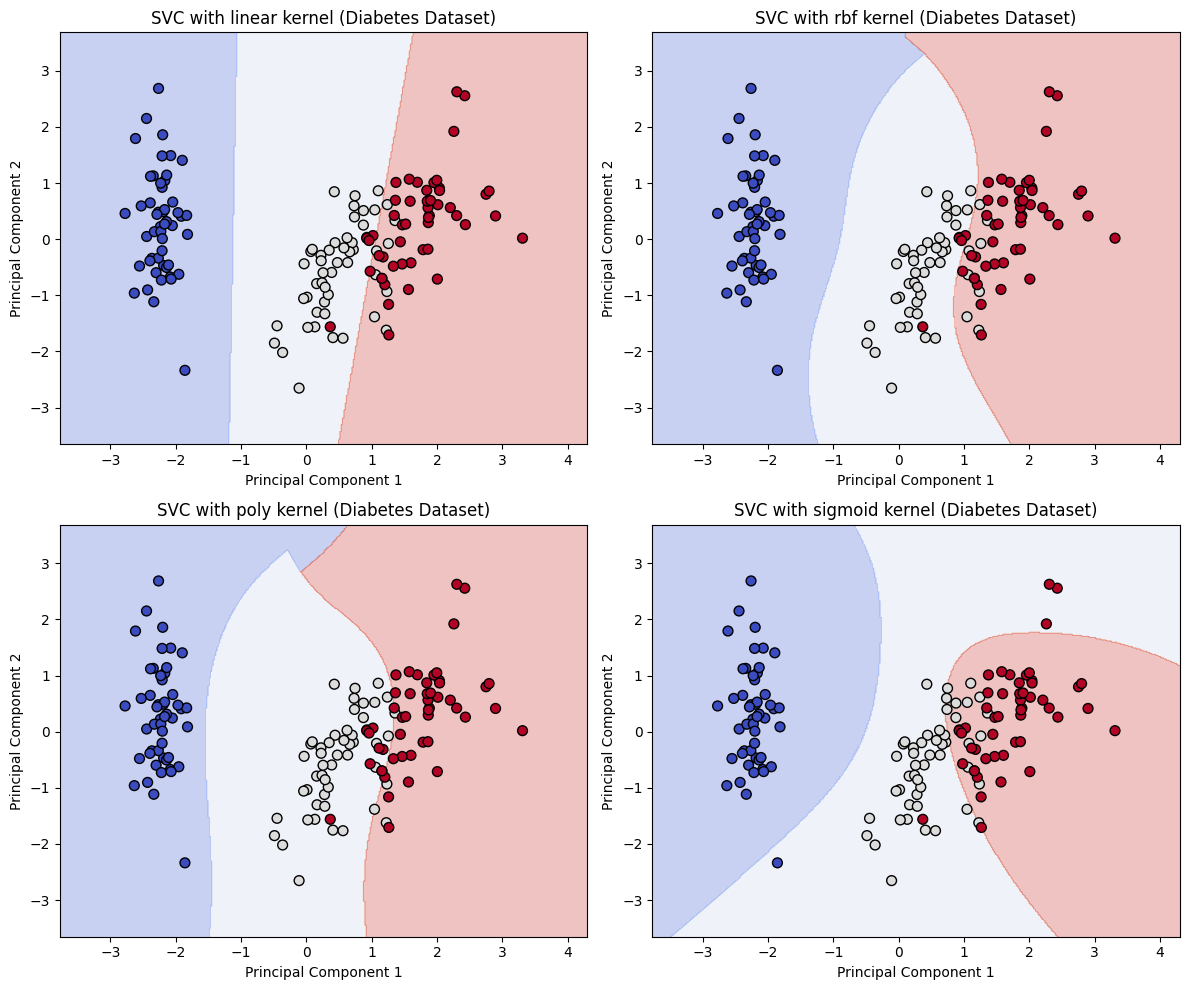

In [ ]:
scaler_diabetes = StandardScaler()
x_scaled_diabetes = scaler_transform = scaler_diabetes.fit_transform(x)

pca_diabetes = PCA(n_components=2)
x_pca_diabetes = pca_diabetes.fit_transform(x_scaled_diabetes)

x_train_diabetes, x_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(x_pca_diabetes, y, test_size=0.2, random_state=42)

kernels = ['linear', 'rbf', 'poly', 'sigmoid']

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()
colors = ['red', 'green']
cmap = plt.cm.coolwarm
for i, kernel in enumerate(kernels):
    clf = SVC(kernel=kernel)
    clf.fit(x_train_diabetes, y_train_diabetes)
    h = .02
    xmin, xmax = x_pca_diabetes[:, 0].min() - 1, x_pca_diabetes[:, 0].max() + 1
    ymin, ymax = x_pca_diabetes[:, 1].min() - 1, x_pca_diabetes[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axs[i].contourf(xx, yy, Z, alpha=0.3, cmap=cmap)

    scatter = axs[i].scatter(x_pca_diabetes[:, 0], x_pca_diabetes[:, 1], c=y, cmap=cmap, edgecolor='k', s=50)
    axs[i].set_title(f'SVC with {kernel} kernel (Diabetes Dataset)')
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')

fig.tight_layout()
plt.show()

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df1=pd.DataFrame(iris.data,columns=iris.feature_names)

In [ ]:
df1.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [ ]:
df1.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


In [ ]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
x=iris.data
y=iris.target
class_names=iris.target_names
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

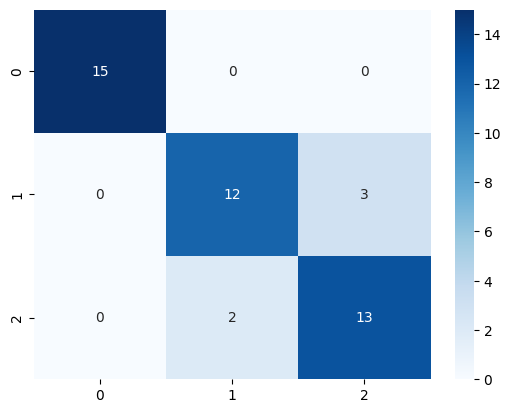

In [ ]:
model=OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

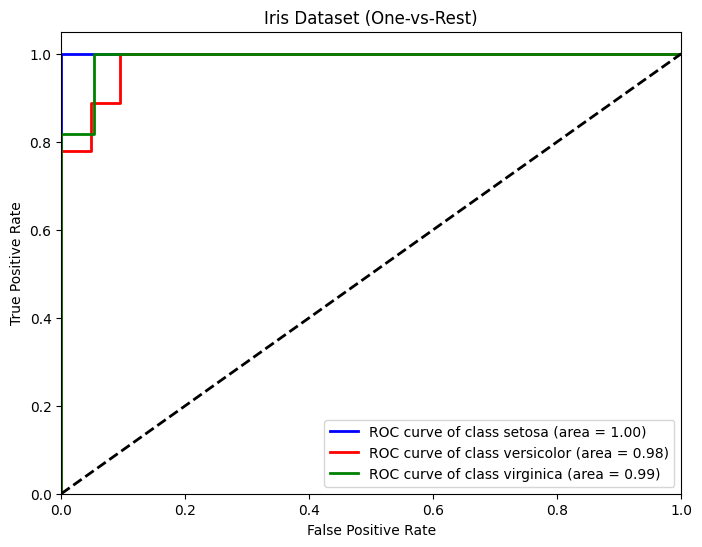

In [ ]:
y_prob = model.predict_proba(x_test)
plt.figure(figsize=(10, 8))

for i, class_name in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {class_name[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

/tmp/ipython-input-3169762533.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[i].scatter(x_train[idx, 0], x_train[idx, 1], c=color,
/tmp/ipython-input-3169762533.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend()
/tmp/ipython-input-3169762533.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[i].scatter(x_train[idx, 0], x_train[idx, 1], c=color,
/tmp/ipython-input-3169762533.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend()
/tmp/ipython-input-3169762533.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[i].scatter(x_train[idx, 0], x_train[idx, 1]

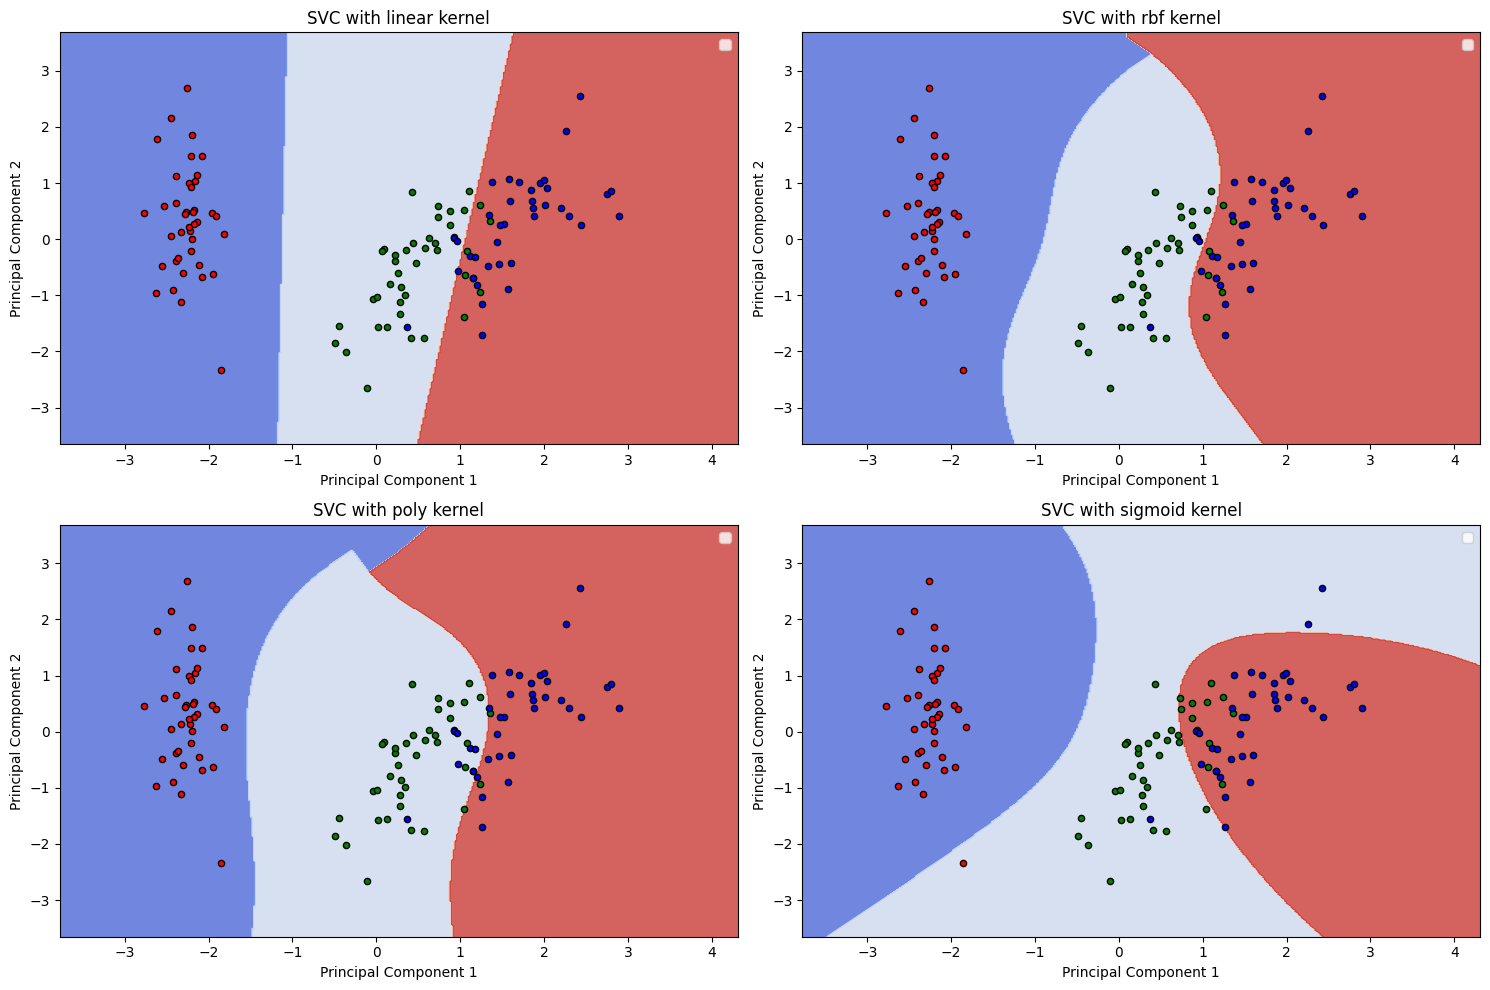

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=42)

kernels = ['linear','rbf','poly','sigmoid']

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs = axs.flatten()

colors = ['red','green','blue']
cmap = plt.cm.coolwarm

for i, kernel in enumerate(kernels):
    model = SVC(kernel=kernel, gamma="scale")
    model.fit(x_train,y_train)

    # Plotting decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
    y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axs[i].contourf(xx, yy, Z, cmap=cmap, alpha=.8)

    # Plotting training points
    for j, color in zip(np.unique(y), colors):
        idx = np.where(y_train == j)
        axs[i].scatter(x_train[idx, 0], x_train[idx, 1], c=color,
                       cmap=cmap, edgecolor='k', s=20)

    axs[i].set_title(f'SVC with {kernel} kernel')
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')
    axs[i].legend()

plt.tight_layout()
plt.show()